In [72]:
# import umap.umap_ as umap
import os
import brie
import anndata
import mygene
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [73]:
#Splicing phenotype detection output file
adata= anndata.read_h5ad("./brieQuant_mode2-diff/brie_quant_cell.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 808 × 65
    obs: 'samID', 'samCOUNT'
    var: 'GeneID', 'GeneName', 'TranLens', 'TranIDs', 'chrom', 'ExonSS', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'Xc'
    varm: 'ELBO_gain', 'cell_coeff', 'effLen', 'fdr', 'intercept', 'p_ambiguous', 'pval', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2', 'poorQual'


In [74]:
# Add devstages to obs
import pandas as pd
anno = pd.read_csv('./out.csv', names=['IDs', 'stage'])
# print(anno)
adata.obs['devstage'] = anno['stage'].values
# adata2.obs['devstage'] = anno['stage'].values
print(adata)

AnnData object with n_obs × n_vars = 808 × 65
    obs: 'samID', 'samCOUNT', 'devstage'
    var: 'GeneID', 'GeneName', 'TranLens', 'TranIDs', 'chrom', 'ExonSS', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'Xc_ids', 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'Xc'
    varm: 'ELBO_gain', 'cell_coeff', 'effLen', 'fdr', 'intercept', 'p_ambiguous', 'pval', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2', 'poorQual'


In [75]:
# Change gene index from Ensembl id to gene name
adata.var['old_index'] = adata.var.index
new_index = [adata.var.GeneName[i] + adata.var.GeneID[i][18:] for i in range(adata.shape[1])]
adata.var.index = new_index

In [76]:
# # generate psi matrix combined with devstages, indexed with sample names, columns = transcript names
psi=pd.DataFrame(adata.layers['Psi'], index=adata.obs.index, columns=adata.var.index)
psi['devstage']=adata.obs['devstage']
# # split into two devstage groups
psi65 = psi[psi['devstage'] == 'stage_6.5']
psi775 = psi[psi['devstage'] == 'stage_7.75']
# # print(psi775)
# # add rows with mean psi
psi65.loc['mean'] = psi65.mean()
# print(psi65)
psi775.loc['mean'] = psi775.mean()


/work/stud2019/mpoets/miniconda/envs/brie2/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':
/work/stud2019/mpoets/miniconda/envs/brie2/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


/work/stud2019/mpoets/miniconda/envs/brie2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Mean PSI')

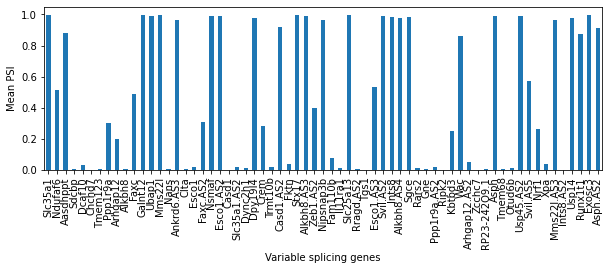

In [77]:
psiMean=psi.mean()
ax=psiMean.plot(kind="bar",figsize=(10,3))
ax.set_xlabel("Variable splicing genes")
ax.set_ylabel("Mean PSI")

Text(0, 0.5, 'Mean PSI')

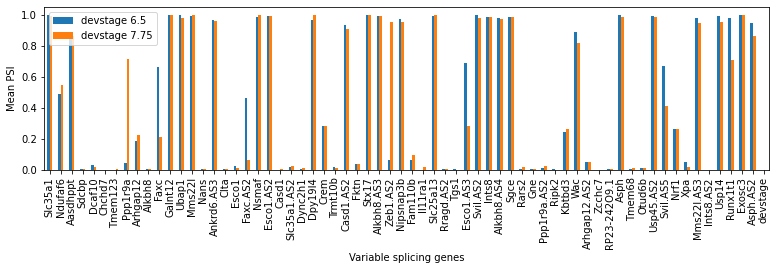

In [78]:
# del psi775['devstage']
# del psi65['devstage']
# x_data=[psi65.T['mean'], psi775.T['mean']]
# psi65.T.plot(kind="bar",figsize=(10,3))= 40)df.plot.bar(x = 'Name', y = ['Events1', 'Events2'], rot =
# psi775.T.plot(kind="bar",figsize=(10,3))
psiMean=pd.DataFrame({'devstage 6.5': psi65.T['mean'], 'devstage 7.75': psi775.T['mean']})
bx=psiMean.plot(y = ['devstage 6.5', 'devstage 7.75'], kind="bar", figsize=(13,3))
bx.set_xlabel("Variable splicing genes")
bx.set_ylabel("Mean PSI")

In [176]:
# generate psi matrix combined with devstages, indexed with sample names, columns = transcript names

iso1=pd.DataFrame(adata.layers['isoform1'].mean(axis=0), columns=adata.var.index)
iso2=pd.DataFrame(adata.layers['isoform2'].mean(axis=0), columns=adata.var.index)
iso1=iso1.T
iso2=iso2.T

# print(iso1)

(65,)


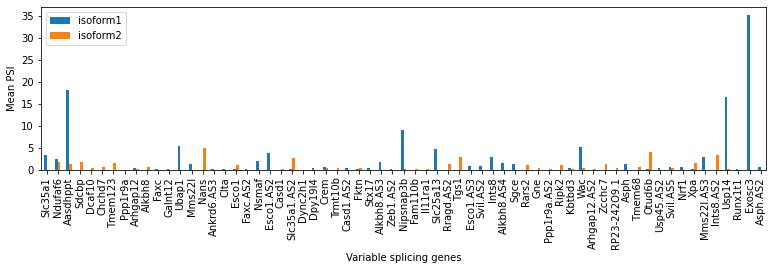

In [180]:
# psiMean=pd.DataFrame({'devstage 6.5': psi65.T['mean'], 'devstage 7.75': psi775.T['mean']})
# isoMean=pd.DataFrame({'isoform1': iso1, 'isoform2': iso2}, index=iso1.index)
cx=isoMean.plot(y = ['isoform1', 'isoform2'], kind="bar", figsize=(13,3))
cx.set_xlabel("Variable splicing genes")
cx.set_ylabel("Mean PSI")
print(iso1.index.shape)

In [ ]:
# Plot mean values devstage 6.65 against mean values devstage 7.75
# psi775.drop(['devstage'])
# psi65.drop(['devstage'])

x_data = psi775.T['mean']
y_data = psi65.T['mean']
fig, ax =  plt.subplots(figsize=(10, 6))

ax.scatter(x_data, y_data, c='b', s=15)

plt.xlabel('mean Psi of transcripts in devstage 7.75')
plt.ylabel('mean Psi of transcripts in devstage 6.5')
plt.title('Transcript differentiation between conditions')

for i, txt in enumerate(x_data.index):
#     Rragd.AS2 Sdcbp
    if(txt=='Rragd.AS2' or txt == 'Nsmaf' or txt=='Mms22l.AS3' or txt=='Kbtbd3'):
        ax.annotate(txt, (x_data[i], y_data[i]))

plt.show()
# print(x_data.index==y_data.index)

In [ ]:
# Add cell annotations from input covariates
# adata.obs['devstage6.5'] = ['6.5d' for x in adata.obsm['Xc'][1, :]]
# adata.obs['devstage7.75'] = ['7.75d' %x for x in adata.obsm['Xc'][:, 1]]

In [ ]:
## volcano plot for differential splicing events
brie.pl.volcano(adata, y='ELBO_gain', log_y=False, n_anno=65, score_red=7, adjust=True)
plt.xlabel('cell_coeff: effect size on logit(Psi)')
plt.title("MS differential splicing")

In [ ]:
DSEs = adata.var.index[adata.varm['ELBO_gain'][:, 1] >= 0]
len(DSEs), len(np.unique([x.split('.')[0] for x in DSEs])), adata.shape
# adata.uns['Xc_ids']

In [ ]:
# Visualize raw counts for DSEs
rank_idx = np.argsort(adata.varm['ELBO_gain'][:, 0])[::-1]

fig = plt.figure(figsize=(15, 8))
brie.pl.counts(adata, genes=list(adata.var.index[rank_idx[:6]]),
               color='devstage', add_val='ELBO_gain', ncol=3, alpha=0.7)
# fig.savefig(dat_dir + '../../figures/fig_s8_counts.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Changed ratio between ambiguous reads
# Some differential splicing events having changed ratio on ambigous reads and isoform specific reads
### Differential splicing shown by isoform1 and ambiguous reads
fig = plt.figure(figsize=(5, 4))
brie.pl.counts(adata, genes='Svil.AS5',
               color='devstage', add_val='ELBO_gain',
               layers=['isoform1', 'ambiguous'],
               nrow=1, alpha=0.7)
plt.show()

In [ ]:
fig = plt.figure(figsize=(5, 4))
brie.pl.counts(adata, genes='Svil.AS2',
               color='devstage', add_val='ELBO_gain',
               layers=['isoform1', 'Psi'],
               nrow=1, alpha=0.7)
plt.show()


In [ ]:
# A violin plot of some of the computed quality measures:
#     the number of genes expressed in the count matrix
#     the total counts per cell
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
# New var have been added to adata
print(adata)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [ ]:
# sc.pl.scatter(adata, x='total_counts', y='pct_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
# adata.layers['Psi'].shape -> (808,65)
# adata.layers['isoform1'].shape -> (808,65)

# Identify number of highly variable genes
fig = plt.figure(figsize=(6, 5))
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)



In [ ]:
# Plot in 2D using PCA
# Elbow plot -> decomposition of dataset
# around 10 PCAs should be enough

sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)


In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [ ]:
import scanpy as sc
# n_pcs = #PCAs
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=12)
sc.tl.umap(adata)
# plot colored by devstages
sc.pl.umap(adata, color=['devstage'])
# gene IDs
# adata.var_names

In [ ]:
# Find marker genes for devstage clustering
# t-test
sc.tl.rank_genes_groups(adata, 'devstage', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [ ]:
# Show top 5 expressed genes per developmental stage
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
# Find marker genes for devstage clustering
# wilcoxon
sc.settings.verbosity = 2  # reduce the verbosity
# Result of a Wilcoxon rank-sum (Mann-Whitney-U) test is very similar
sc.tl.rank_genes_groups(adata, 'devstage', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [ ]:
# Show top 5 expressed genes per developmental stage
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)


In [ ]:
mg = mygene.MyGeneInfo()
# geneNames=mg.querymany(adata.var.GeneID, scopes='ensembl.gene', field='symbol')
# print(geneNames[50]['symbol'])
adata.var[adata.var.index=='Exosc3']
adata.var[adata.var.index=='Rragd.AS2']
adata.var[adata.var['GeneName']=='Sdcbp']

In [ ]:
# sc.pl.highly_variable_genes(adata)
# sc.pl.pca(adata, color='devstage')
sc.pl.umap(adata, color=['Exosc3', 'Rragd.AS2', 'Sdcbp'], gene_symbols=adata.var.GeneName)

In [ ]:
# adata.obs["samCOUNT"]
# adata.layers["Psi"].shape
# !pwd
# list(adata.X)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

In [ ]:
# Find marker genes for leiden clustering
# ranking for the highly differential genes in each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', raw=False)
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False, raw=False)

In [ ]:
#Show 5 top ranked genes per leiden cluster 0, 1, …, 16 in a dataframe.
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
# Get table with scores and groups for 5 top ranked genes per leiden cluster 0, 1, …, 16
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(5)

In [ ]:
# sc.pp.pca(adata)
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)
# sc.tl.leiden(adata, key_added="clusters")

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

# new_cluster_names = [
#     'CD4 T', 'CD14 Monocytes',
#     'B', 'CD8 T',
#     'NK', 'FCGR3A Monocytes',
#     'Dendritic', 'Megakaryocytes']
# adata.rename_categories('leiden', new_cluster_names)
# sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
# Result of a Wilcoxon rank-sum (Mann-Whitney-U) test is very similar
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [ ]:
# Alternatively rank genes using logistic regression
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [ ]:
# Original example h5ad file -> test
path='/work/stud2019/mpoets/SysMed_MA/msEAE/brie_quant_cell.h5ad'
adata2=anndata.read_h5ad(path)
adata2.obs["samID"]

In [ ]:
import csv

path="/work/stud2019/mpoets/no_backup/brie/examples/output/cell_info.tsv"
tsv_file = open(path)
read_tsv = csv.reader(tsv_file, delimiter="\t")
ID_list=[]

for i in read_tsv:
    if i[1]=='1':
        ID_list.append([i[0], 'stage_6.5'])
    elif i[2]=='1':
        ID_list.append([i[0], 'stage_7.75'])
# print(ID_list)
# Convert list to csv

with open("out.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(ID_list)
